In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
week_max = 2
data = [(0, 32), (1, 11), (2, 30),(8, 15)]
columns = ['day', 'count']

In [35]:
df = pd.DataFrame(data, columns=columns)
print(df)

   day  count
0    0     32
1    1     11
2    2     30
3    8     15


In [27]:
idx = pd.date_range('2023-01-01', end='2023-01-14', freq='D')
print(idx)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14'],
              dtype='datetime64[ns]', freq='D')


In [48]:
print(np.linspace(0,week_max*7-1,week_max*7))
df1 = df.reindex(df.index.union(np.linspace(0,week_max*7-1,week_max*7)))
df1.interpolate(method='linear', inplace=True)
print(df1)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
      day  count
0.0   0.0   32.0
1.0   1.0   11.0
2.0   2.0   30.0
3.0   8.0   15.0
4.0   8.0   15.0
5.0   8.0   15.0
6.0   8.0   15.0
7.0   8.0   15.0
8.0   8.0   15.0
9.0   8.0   15.0
10.0  8.0   15.0
11.0  8.0   15.0
12.0  8.0   15.0
13.0  8.0   15.0


In [36]:
day_list = [0,8]
# day_list = pd.to_datetime(day_list, unit='D', origin=pd.Timestamp('2023-01-01')).to_series()
day_list = pd.DataFrame(day_list,columns=['day'])
day_list['date'] = pd.to_datetime(day_list['day'], unit='D', origin='2023-01-01')
day_list = day_list.set_index('date').resample('D').asfreq()
day_list['day'] = day_list['day'].interpolate(method='linear', limit_direction='both').astype(int)
# day_list['date'] = day_list['date'].interpolate(method='linear')
print(day_list)
print(day_list.index)

            day
date           
2023-01-01    0
2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
2023-01-07    6
2023-01-08    7
2023-01-09    8
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09'],
              dtype='datetime64[ns]', name='date', freq='D')


In [37]:
# df['date'] = pd.to_datetime(df['day'], unit='D', origin='2023-01-01')  # Assuming 2023-01-01 is the start date
df['date'] = day_list.index[df['day']]
print(df)

   day  count       date
0    0     32 2023-01-01
1    1     11 2023-01-02
2    2     30 2023-01-03
3    8     15 2023-01-09


In [38]:

# Resample the DataFrame with daily frequency
daily_df = df.set_index('date').resample('D').asfreq()

# Interpolate the 'count' column
daily_df['count'] = daily_df['count'].interpolate(method='linear', limit_direction='both').astype(int)
daily_df['day'] = daily_df['day'].interpolate(method='linear', limit_direction='both').astype(int)
print(daily_df)

            day  count
date                  
2023-01-01    0     32
2023-01-02    1     11
2023-01-03    2     30
2023-01-04    3     27
2023-01-05    4     25
2023-01-06    5     22
2023-01-07    6     20
2023-01-08    7     17
2023-01-09    8     15


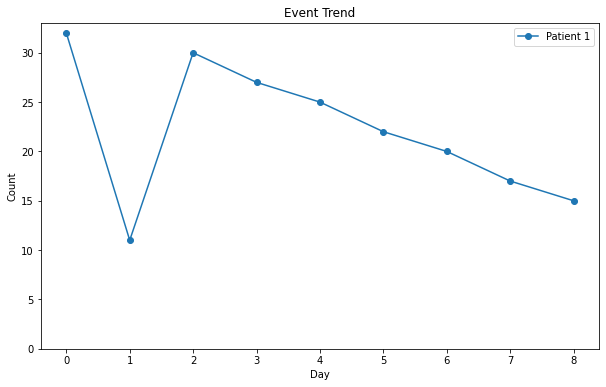

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(daily_df['day'], daily_df['count'], marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Count')
plt.ylim(ymin=0)
plt.title('Event Trend')
plt.legend(['Patient 1'])
# plt.grid(True)
plt.show()